# WeatherPy
## Analysis
* How close a region is to the equator relates to increased temperatures in that area, with the fact that at areas where the latitude is 0, you have a relatively even spread of maximum temperatures. Meanwhile, this is consistent with the idea that the tilt of the earth causes the seasons, and that is a fact confirmed by NASA. https://spaceplace.nasa.gov/seasons/en/
* The equator seems to have less wind speed than other locations on Earth but the difference is minimal.
* Cloudiness and humidity ranges in cities aren't affected by their proximity to the earth's equator. I would assume that those values are affected by their closeness to bodies of water, this is only a hypothesis and needs to be explored further.

In [1]:
# Dependencies
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy.core as ow
from datetime import datetime
from citipy import citipy
from progressbar import ProgressBar

In [2]:
# latitude range is (-90,90) longitude range is (-180,180)
lat_coord = np.random.uniform(-90,91,1000)
lng_coord = np.random.uniform(-180,181,1000)

## Generate Cities Dataframe

In [3]:
weather_df = pd.DataFrame()
weather_df['city_name'] = ''
weather_df['country_code'] = ''
weather_df['latitude'] = ''
weather_df['longitude'] = ''

bar = ProgressBar()
for i in bar(range(len(lat_coord))):
    weather_df.at[i,'city_name'] = citipy.nearest_city(lat_coord[i], lng_coord[i]).city_name
    weather_df.at[i,'country_code'] = citipy.nearest_city(lat_coord[i], lng_coord[i]).country_code
    weather_df.at[i,'latitude'] = round(lat_coord[i],4)
    weather_df.at[i,'longitude']= round(lng_coord[i],4)

100% (1000 of 1000) |####################| Elapsed Time: 0:00:02 Time:  0:00:02


In [4]:
weather_df.head()

,city_name,country_code,latitude,longitude
0,bathsheba,bb,18.0183,-49.4282
1,lapi,ph,17.6478,121.91
2,tasiilaq,gl,76.7762,-40.9308
3,port hardy,ca,45.1242,-131.003
4,buala,sb,-7.9703,158.332


## Perform Weather API Calls

In [5]:
# Create settings dictionary with information we're interested in
api_key = "7000bf4dfa565802d1a0bc7afae50bec" #found api key that can make these calls.
settings = {"units": "imperial", "appid": api_key}

All url references to the recorded city-weather data is in the **data_path.csv** file.

In [7]:
weather_df['date'] = ''
weather_df['max_temp'] = ''
weather_df['humidity'] = ''
weather_df['cloudiness'] = ''
weather_df['wind_speed'] = ''

to_csv1 = []
to_csv2 = []

count = 1
url = 'http://api.openweathermap.org/data/2.5/weather?'

progress = ProgressBar(max_value=len(lat_coord)).start()
for index, row in weather_df.iterrows():
    try:
        weather_data = ow.get_current("{},{}".format(row['city_name'],
            row['country_code']),**settings)
        
        weather_df.at[index, 'date'] = weather_data('dt')
        weather_df.at[index, 'max_temp'] = weather_data('main.temp_max')
        weather_df.at[index, 'humidity'] = weather_data('main.humidity')
        weather_df.at[index, 'cloudiness'] = weather_data('clouds.all')
        weather_df.at[index, 'wind_speed'] = weather_data('wind.speed')
        
        to_csv1.append("Record {} of {} | {}".format(count, len(weather_df), row['city_name']))
        to_csv2.append("{}APPID={}&units={}&q={},{}".format(url, api_key, settings['units'], row['city_name'], row['country_code']))
        
        count += 1
        
        progress.update(index+1)
        
    except:
        weather_df.at[index, 'date']= np.nan
        weather_df.at[index, 'max_temp']= np.nan
        weather_df.at[index, 'humidity']= np.nan
        weather_df.at[index, 'cloudiness']= np.nan
        weather_df.at[index, 'wind_speed']= np.nan
        
        count += 1
        progress.update(index+1)
        
progress.finish()
# write data url's to csv
csv_out = open('./data/data_urlPaths_20190314.csv','w+')
writer = csv.writer(csv_out)
for row in zip(to_csv1,to_csv2):
    writer.writerow(row)
csv_out.close()

#show that all the cities have been gathered.
for x in range(len(weather_df)):
    print (f"{to_csv1[x]} \n")
    print (f"{to_csv2[x]} \n")



100% (1000 of 1000) |####################| Elapsed Time: 0:00:30 Time:  0:00:30


Record 1 of 1000 | bathsheba 

http://api.openweathermap.org/data/2.5/weather?APPID=7000bf4dfa565802d1a0bc7afae50bec&units=imperial&q=bathsheba,bb 

Record 2 of 1000 | lapi 

http://api.openweathermap.org/data/2.5/weather?APPID=7000bf4dfa565802d1a0bc7afae50bec&units=imperial&q=lapi,ph 

Record 3 of 1000 | tasiilaq 

http://api.openweathermap.org/data/2.5/weather?APPID=7000bf4dfa565802d1a0bc7afae50bec&units=imperial&q=tasiilaq,gl 

Record 4 of 1000 | port hardy 

http://api.openweathermap.org/data/2.5/weather?APPID=7000bf4dfa565802d1a0bc7afae50bec&units=imperial&q=port hardy,ca 

Record 5 of 1000 | buala 

http://api.openweathermap.org/data/2.5/weather?APPID=7000bf4dfa565802d1a0bc7afae50bec&units=imperial&q=buala,sb 

Record 6 of 1000 | victoria 

http://api.openweathermap.org/data/2.5/weather?APPID=7000bf4dfa565802d1a0bc7afae50bec&units=imperial&q=victoria,sc 

Record 9 of 1000 | djambala 

http://api.openweathermap.org/data/2.5/weather?APPID=7000bf4dfa565802d1a0bc7afae50bec&units=impe

IndexError: list index out of range

In [ ]:
#weather_df.to_csv('city_weather_data.csv', index_label='city_id')

In [8]:
# remove nan rows
weather_df = weather_df.dropna()
weather_df.count()

city_name       864
country_code    864
latitude        864
longitude       864
date            864
max_temp        864
humidity        864
cloudiness      864
wind_speed      864
dtype: int64

In [9]:
# display ecuator weather dataframe
weather_df.head()

,city_name,country_code,latitude,longitude,date,max_temp,humidity,cloudiness,wind_speed
0,bathsheba,bb,18.0183,-49.4282,1552582800,84.2,66,40,17.22
1,lapi,ph,17.6478,121.91,1552584974,70.66,98,92,1.7
2,tasiilaq,gl,76.7762,-40.9308,1552582200,24.8,85,75,4.7
3,port hardy,ca,45.1242,-131.003,1552582800,41,86,75,5.82
4,buala,sb,-7.9703,158.332,1552584974,81.01,93,8,6.17


In [10]:
weather_df.to_csv('./data/city_weather_data.csv', index_label='city_id')

## Latitude vs Temperature Plot

In [11]:
plot_date = datetime.fromtimestamp(weather_df['date'][0])\
                    .strftime('%Y-%m-%d %H:%M:%S').split()[0]

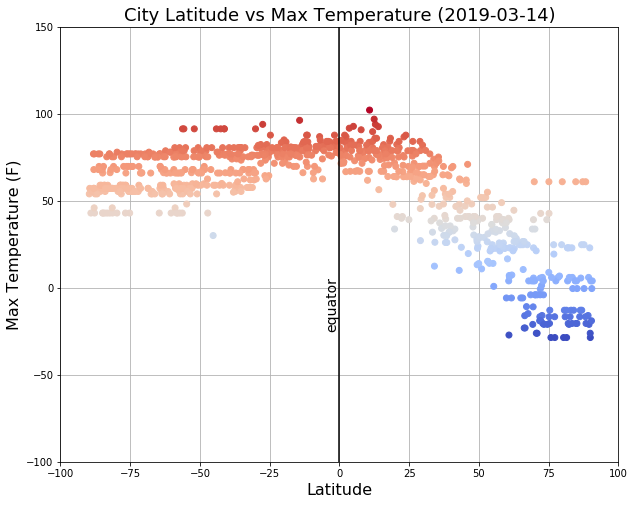

In [12]:
fig,ax = plt.subplots(figsize=(10,8))

scatter = ax.scatter(weather_df['latitude'],weather_df['max_temp'], 
            c=weather_df['max_temp'], cmap=plt.cm.coolwarm, zorder=2)

# fig.colorbar(scatter)

ax.set_title('City Latitude vs Max Temperature ({})'.format(plot_date), fontdict={"fontsize":18})
ax.set_xlabel('Latitude', fontdict={"fontsize":16})
ax.set_ylabel('Max Temperature (F)', fontdict={"fontsize":16})
ax.set_xlim(-100,100)
ax.set_ylim(-100,150)
ax.vlines(0,-100,150)
ax.text(-5,0,'equator', rotation=90, fontdict={"fontsize":14})
ax.grid()

plt.savefig('../images/max_temp.png')
plt.show()

## Latitude vs Humidity Plot

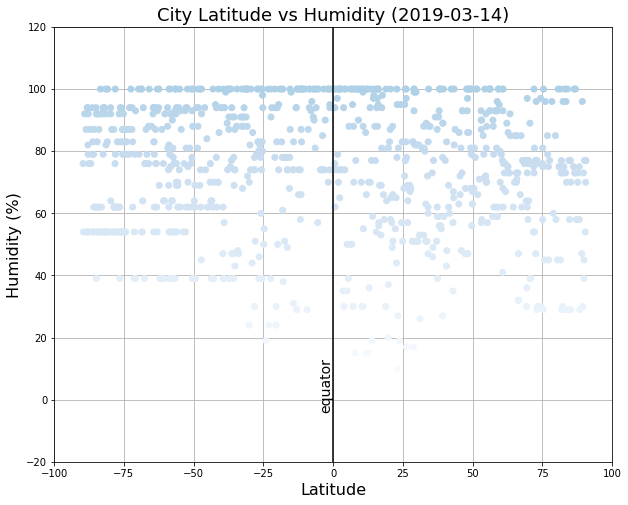

In [13]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(weather_df['latitude'],weather_df['humidity'],
           c=weather_df['humidity'], cmap=plt.cm.Blues, zorder=2)


ax.set_title('City Latitude vs Humidity ({})'.format(plot_date), fontdict={"fontsize":18})
ax.set_xlabel('Latitude', fontdict={"fontsize":16})
ax.set_ylabel('Humidity (%)', fontdict={"fontsize":16})
ax.set_xlim(-100,100)
ax.set_ylim(-20,120)
ax.vlines(0,-20,120)
ax.text(-5, 10,'equator', rotation=90, fontdict={"fontsize":14})

ax.grid()
plt.savefig('../images/humidity.png')
plt.show()

## Latitude vs Cloudiness Plot

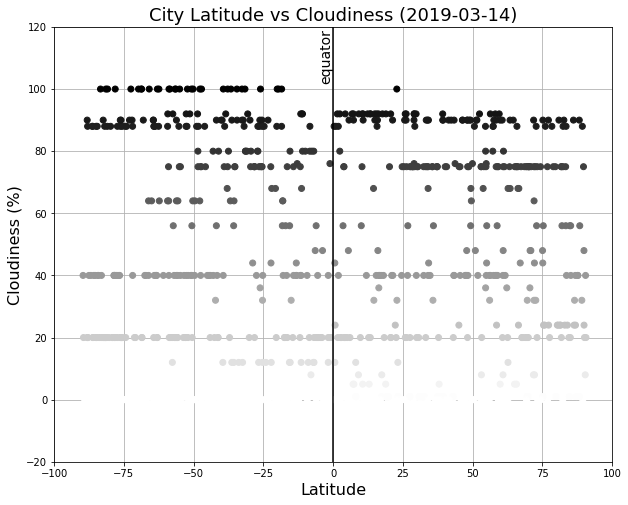

In [14]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(weather_df['latitude'],weather_df['cloudiness'],
           c=weather_df['cloudiness'], cmap=plt.cm.binary, zorder=2)

ax.set_title('City Latitude vs Cloudiness ({})'.format(plot_date), fontdict={"fontsize":18})
ax.set_xlabel('Latitude', fontdict={"fontsize":16})
ax.set_ylabel('Cloudiness (%)', fontdict={"fontsize":16})
ax.set_xlim(-100,100)
ax.set_ylim(-20,120)
ax.vlines(0,-20,120)
ax.text(-5,116,'equator', rotation=90, fontdict={"fontsize":14})

ax.grid()
plt.savefig('../images/cloudiness.png')
plt.show()

## Latitude vs Wind Speed Plot

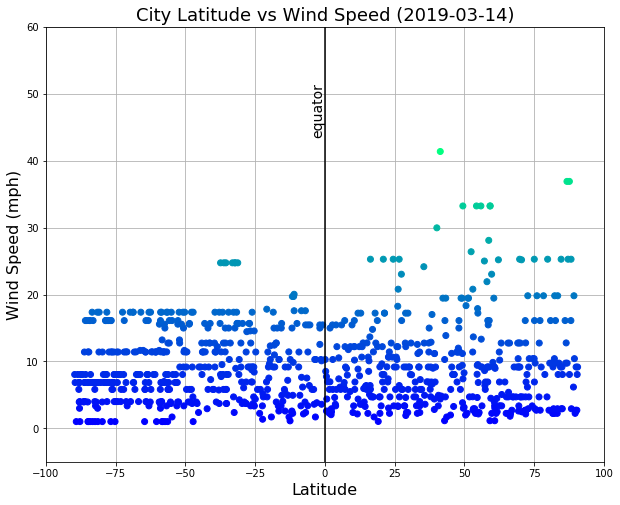

In [15]:
fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(weather_df['latitude'],weather_df['wind_speed'],
           c=weather_df['wind_speed'], cmap=plt.cm.winter, zorder=2) 

ax.set_title('City Latitude vs Wind Speed ({})'.format(plot_date), fontdict={"fontsize":18})
ax.set_xlabel('Latitude', fontdict={"fontsize":16})
ax.set_ylabel('Wind Speed (mph)', fontdict={"fontsize":16})
ax.set_xlim(-100,100)
ax.set_ylim(-5,60)
ax.vlines(0,-5,60)
ax.text(-5,50,'equator', rotation=90, fontdict={"fontsize":14})

ax.grid()
plt.savefig('../images/wind_speed.png')
plt.show()